In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
load_path = r'../preprocessing_data/'
load_sub = r'../data/'

train_df = pd.read_csv(load_path + 'preprocessed_train.csv')
test_df = pd.read_csv(load_path + 'preprocessed_test.csv')
submission = pd.read_csv(load_sub + 'submission.csv')

# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = train_df.drop(['box_off_num'], axis = 1)
y = train_df['box_off_num']

In [8]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [10]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

rf_pred = rf.predict(valid_x)

rf_mae = mean_absolute_error(valid_y, rf_pred)
rf_rmse = root_mean_squared_error(valid_y, rf_pred)

print(f'''
Random Forest
    MAE : {rf_mae}
    RMSR : {rf_rmse}
''')


Random Forest
    MAE : 682986.7911666667
    RMSR : 1455025.3188581946



# visualization

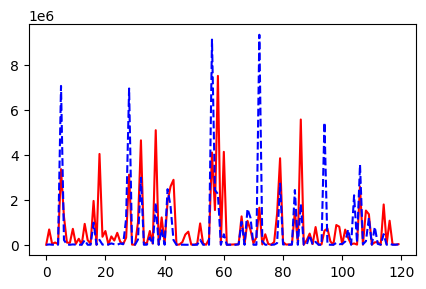

In [11]:
plt.figure(figsize = (5, 3))

plt.plot(range(len(valid_y)), rf_pred, color = 'red')
plt.plot(range(len(valid_y)), valid_y, color = 'blue', linestyle = '--')

plt.show()

# test data

In [12]:
test_x = test_df

test_pred = rf.predict(test_x)

In [14]:
submission['box_off_num'] = test_pred

submission

,title,box_off_num
0,용서는 없다,3656826.71
1,아빠가 여자를 좋아해,1722338.36
2,하모니,1723376.92
3,의형제,2146596.46
4,평행 이론,1303520.76
...,...,...
238,해에게서 소년에게,385727.09
239,울보 권투부,5663.53
240,어떤살인,283979.91
241,말하지 못한 비밀,8646.85


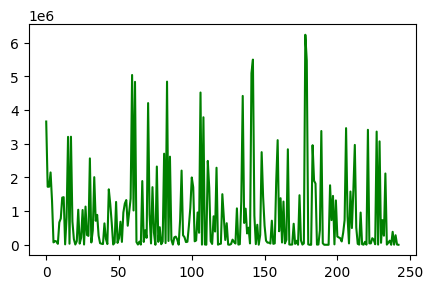

In [16]:
plt.figure(figsize = (5, 3))

plt.plot(range(submission.shape[0]), test_pred, color = 'green')

plt.show()

In [17]:
cond = submission['box_off_num'] == max(test_pred)

submission[cond]

,title,box_off_num
178,명량,6229943.8


In [18]:
sorted_sub = submission.sort_values(['box_off_num'], ascending = False)

sorted_sub[:5]

,title,box_off_num
178,명량,6229943.80
142,박수건달,5493292.00
179,군도: 민란의 시대,5460941.50
141,마이 리틀 히어로,5090264.51
59,세상에서 가장 아름다운 이별,5037385.27
